# Aula de Analise Exploratoria

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true")

In [3]:
df.head()

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232


In [4]:
df.shape


(362451, 9)

# Analisando Variaveis Qualitativas

In [5]:
df.V0302.value_counts()

Feminino     186054
Masculino    176397
Name: V0302, dtype: int64

In [6]:
df.V0302.value_counts() / df.shape[0] * 100

Feminino     51.33218
Masculino    48.66782
Name: V0302, dtype: float64

In [7]:
df.V0404.value_counts() / df.shape[0] * 100

Parda             47.932824
Branca            42.928561
Preta              8.310089
Amarela            0.427644
Indígena           0.395916
Sem declaração     0.004966
Name: V0404, dtype: float64

# Analise da Variaveis Quantitativas 

In [8]:
df.V8005.mean() # Media

32.63801175883085

In [9]:
df.V8005.median() # Mediana

30.0

In [10]:
df.V8005.std()  # Desvio Padrao

20.77032627236747

In [11]:
df.V8005.describe() #Todos os Valores

count    362451.000000
mean         32.638012
std          20.770326
min           0.000000
25%          15.000000
50%          30.000000
75%          48.000000
max         117.000000
Name: V8005, dtype: float64

In [12]:
df.describe() # Todos os Valores, De todas as variasveis.

,V0101,V8005,V4729
count,362451.0,362451.000000,362451.000000
mean,2012.0,32.638012,543.183294
std,0.0,20.770326,260.364253
min,2012.0,0.000000,174.000000
25%,2012.0,15.000000,334.000000
50%,2012.0,30.000000,522.000000
75%,2012.0,48.000000,705.000000
max,2012.0,117.000000,1132.000000


In [13]:
df.dtypes # Ver tipos de variaveis 

V0101     int64
UF       object
V0302    object
V8005     int64
V0404    object
V4803    object
V4718    object
V4720    object
V4729     int64
dtype: object

In [14]:
# -> Trabalhar com dataset Grandes modin , dask

# Trasformar Object em Float

In [15]:
#V4718 e V4720

In [16]:
df['V4718'] = pd.to_numeric(df['V4718'], errors="coerce")
df['V4720'] = pd.to_numeric(df['V4718'], errors="coerce")

In [17]:
df.describe()

,V0101,V8005,V4718,V4720,V4729
count,362451.0,362451.000000,168981.000000,168981.000000,362451.000000
mean,2012.0,32.638012,1342.847628,1342.847628,543.183294
std,0.0,20.770326,2656.679175,2656.679175,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,622.000000,334.000000
50%,2012.0,30.000000,800.000000,800.000000,522.000000
75%,2012.0,48.000000,1400.000000,1400.000000,705.000000
max,2012.0,117.000000,350000.000000,350000.000000,1132.000000


# Analise Visual  46.19

In [18]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 292 kB 4.4 MB/s            


In [19]:
sns.set(style= 'whitegrid')

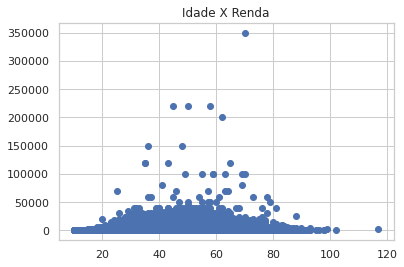

In [20]:
#Idade x Renda
plt.scatter(df.V8005,df.V4718)
plt.title("Idade X Renda")
plt.show()

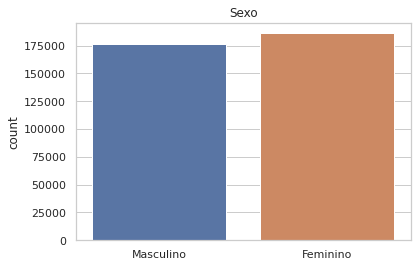

In [26]:
# Sexo
sns.countplot(x=df.V0302)
plt.title("Sexo")
plt.xlabel("")
plt.show()

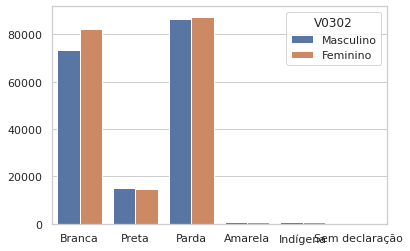

In [22]:
sns.countplot(x=df.V0404 , hue=df.V0302)
plt.xlabel("")
plt.ylabel("")
plt.show()

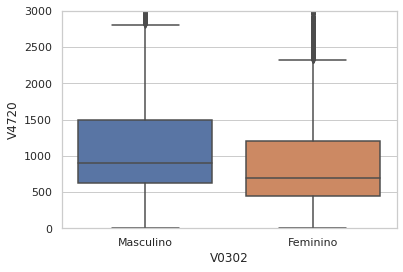

In [23]:
sns.boxplot(x=df.V0302,y=df.V4720)
plt.ylim(0, 3000)
plt.show()

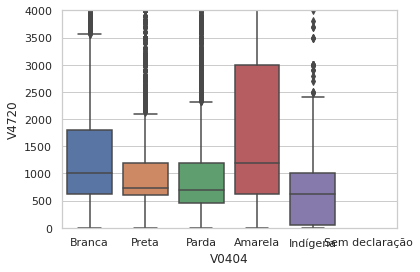

In [24]:
sns.boxplot(x=df.V0404,y=df.V4720)
plt.ylim(0,4000)
plt.show()

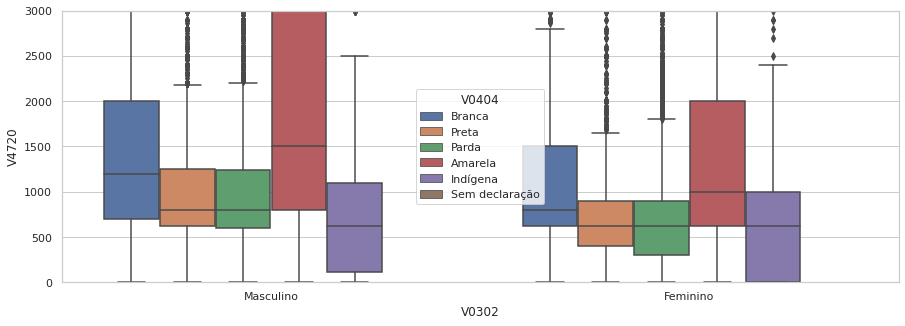

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.V0302,y=df.V4720,hue=df.V0404)
plt.ylim(0 , 3000)
plt.show()

# Limpa Dandos
## Pega subdata de 18 a 80 anos

In [36]:
amostra = df.loc[(df.V8005 >= 18) & (df.V8005 <= 80) & (df.V4720 > 0)]

In [37]:
amostra.describe()

,V0101,V8005,V4718,V4720,V4729
count,152465.0,152465.000000,152465.000000,152465.000000,152465.000000
mean,2012.0,38.306818,1474.633982,1474.633982,543.260643
std,0.0,12.669668,2760.054778,2760.054778,265.643859
min,2012.0,18.000000,1.000000,1.000000,174.000000
25%,2012.0,28.000000,622.000000,622.000000,333.000000
50%,2012.0,37.000000,900.000000,900.000000,494.000000
75%,2012.0,47.000000,1500.000000,1500.000000,689.000000
max,2012.0,80.000000,350000.000000,350000.000000,1132.000000


# Estatitica descritiva agrupadas
## agrupa por SeXo x media salarial

In [40]:
amostra.groupby(df.V0302).agg({'V4720':'mean'})

,V4720
V0302,
Feminino,1221.115417
Masculino,1655.503360


# Estatitica descritiva agrupadas
## Agrupa por Raça , Sexo e  Media salarial.

In [41]:
amostra.groupby(["V0404","V0302"]).agg({'V4720':'mean'})

V4720
V0404    V0302                 
Amarela  Feminino   2258.087662
         Masculino  3542.643052
Branca   Feminino   1529.147839
         Masculino  2168.098501
Indígena Feminino   1051.083333
         Masculino  1240.268608
Parda    Feminino    947.615567
         Masculino  1259.249383
Preta    Feminino    876.474815
         Masculino  1235.539334

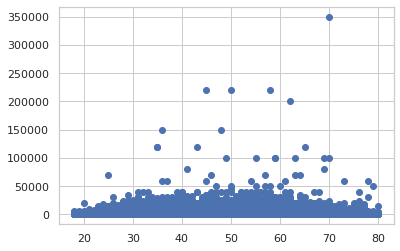

In [48]:
plt.scatter(amostra.V8005,amostra.V4720)
plt.show()

# Estatitica descritiva agrupadas
## Agrupa por Idade x media salarial.

In [50]:
g = amostra.groupby('V8005').agg({'V4720': 'mean'})

In [52]:
g.reset_index(inplace=True)

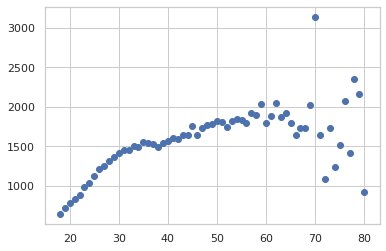

In [57]:
plt.scatter(x=g.V8005,y=g.V4720)
plt.show()